In [1]:
import pycaret
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("co2.csv")

df.head()

YYYYMM   Value
0  197301  72.076
1  197302  64.442
2  197303  64.084
3  197304  60.842
4  197305  61.798

In [3]:
df.isna().sum()

YYYYMM    0
Value     0
dtype: int64

In [4]:
df['year'] = df['YYYYMM'].astype('str').apply(lambda x : x[:-2])
df['month'] = df['YYYYMM'].astype('str').apply(lambda x : x[4:])
df.head()

YYYYMM   Value  year month
0  197301  72.076  1973    01
1  197302  64.442  1973    02
2  197303  64.084  1973    03
3  197304  60.842  1973    04
4  197305  61.798  1973    05

In [5]:
print("Minimum Year: ", df['year'].min())
print("Maximum Year: ", df['year'].max())
print("List of Unique Years: ", len(df['year'].unique()) )
df['year'].unique()

print("-"*50)
print("Minimum Month: ", df['month'].min())
print("Maximum Month: ", df['month'].max())
print("List of Unique Months: ", len(df['month'].unique()) )
df['month'].unique()

Minimum Year:  1973
Maximum Year:  2016
List of Unique Years:  44
--------------------------------------------------
Minimum Month:  01
Maximum Month:  12
List of Unique Months:  12


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

# Pycaret

In [6]:
from pycaret.datasets import get_data
from pycaret.regression import *
reg = setup(data = df, target='Value')

In [7]:
compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=6922, ...)

In [8]:
selModel = create_model('lightgbm')
selModel

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=6922)

In [9]:
print("Best Score: ", selModel.best_score_)
print("Best Iteration: ", selModel.best_iteration_)
print("Best Parameters: ", selModel.get_params())

Best Score:  defaultdict(<class 'collections.OrderedDict'>, {})
Best Iteration:  0
Best Parameters:  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 6922, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [13]:
X = df[['month', 'year']].values
y = df['Value'].values

print(X.shape, y.shape)

(523, 2) (523,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Shape: ", X_train.shape, y_train.shape)
print("Test Shape: ", X_test.shape, y_test.shape)

Train Shape:  (418, 2) (418,)
Test Shape:  (105, 2) (105,)


# XGBRegressor

In [18]:
# Import Library
import xgboost as xgb

# Create Model
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.08, subsample=0.75, colsample_bytree=1,  max_depth=7, gamma=0)

# Data Fit in Model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb_scores = cross_val_score(model, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % xgb_scores.mean())

Mean cross-validation score: 0.97


In [20]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % (rmse))

r2 = np.sqrt(r2_score(y_test, y_pred))
print("R_Squared Score : %.2f" % (r2))

RMSE: 7.12
R_Squared Score : 0.98


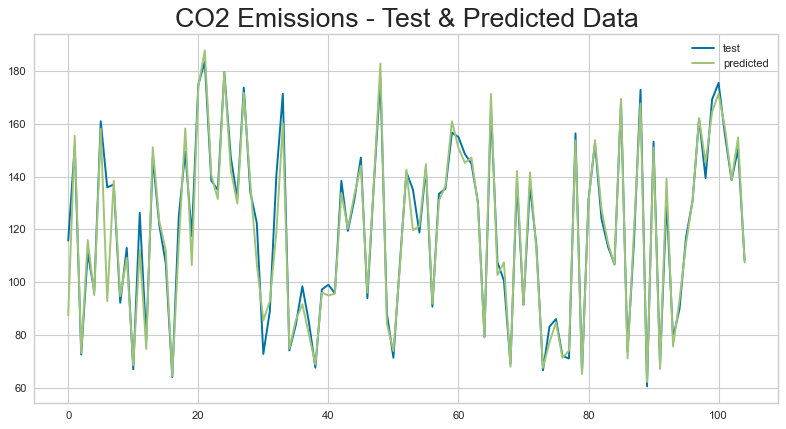

In [22]:
plt.figure(figsize=(12, 6), dpi=80)
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("CO2 Emissions - Test & Predicted Data", fontsize=24)
plt.legend()
plt.show()

# RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xgb_scores = cross_val_score(model, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % xgb_scores.mean())

Mean cross-validation score: 0.96


In [27]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % (rmse))

r2 = np.sqrt(r2_score(y_test, y_pred))
print("R_Squared Score : %.2f" % (r2))

RMSE: 8.53
R_Squared Score : 0.97


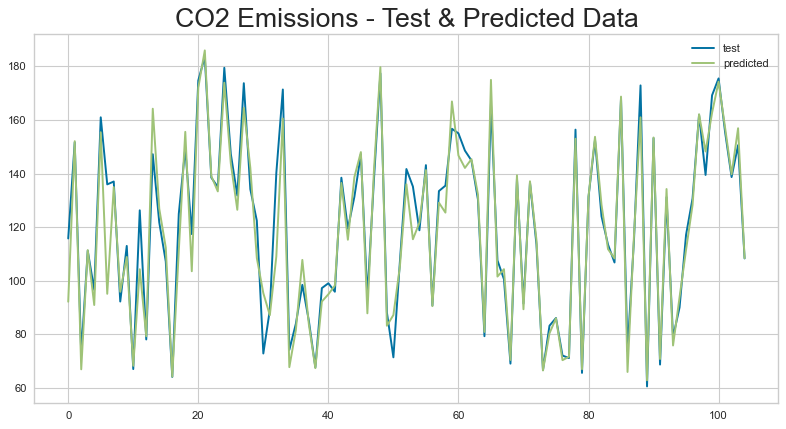

In [28]:
plt.figure(figsize=(12, 6), dpi=80)
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("CO2 Emissions - Test & Predicted Data", fontsize=24)
plt.legend()
plt.show()